# Experiência 2: Projeto de Filtros FIR

Jean Carlos Mello Xavier Faria - 11259628

Oliver de Noronha Rissato - 11375361

Primeiramente vamos importar as bibliotecas necessárias

In [1]:
using Plots, DSP, LinearAlgebra, LaTeXStrings, Polynomials , Roots


(process:24076): GLib-GIO-WARNING **: 22:27:45.829: Unexpectedly, UWP app `IOForth.Screenrecord-screenrecorder_1.0.10.0_x64__pxs7cjhtcq1xt' (AUMId `IOForth.Screenrecord-screenrecorder_pxs7cjhtcq1xt!App') supports 2 extensions but has no verbs


$\textbf{1)}$ Neste exercício iremos projetar os filtros solicitados utilizando o método de mínimos quadrados:
$\\ \ \textbf{a)}$ O primeiro é um filtro passa baixas com frequência de corte $ \omega_c = \frac{\pi}{4}$.  
Utilizaremos 101 coeficiêntes para aproximar o projeto à um filtro ideal

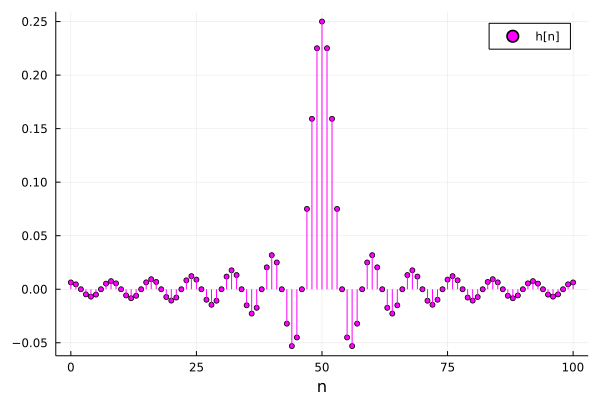

In [2]:
N = 101
n = 0:N - 1
L = (N - 1) ÷ 2
ωc = π/4
h = (ωc/π) * sinc.( (ωc / π) * (n .- L))

plot(n, h, line = :stem, marker = (:circle, 3), xlabel = "n", label = "h[n]", color = :magenta)

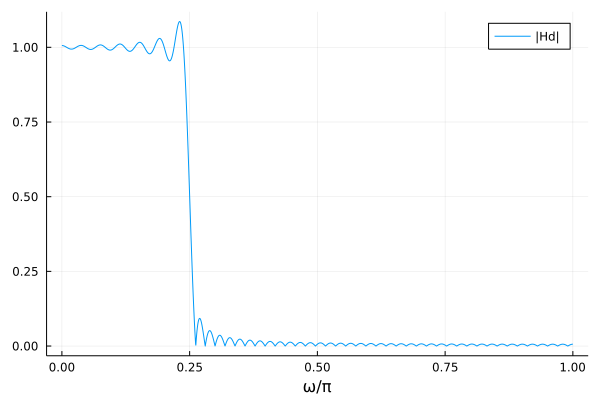

In [3]:
hdf = PolynomialRatio(h, [1])
ω = range(0, π, length = 2500)
Hd = freqresp(hdf, ω)
plot(ω / π, abs.(Hd), label = "|Hd|", xlabel = "ω/π")

$\\ \ \textbf{b)}$ O segundo é um filtro passa altas com frequência de corte $ \omega_c = \frac{\pi}{4}$.  
Utilizaremos 101 coeficientes para aproximar o projeto à um filtro ideal

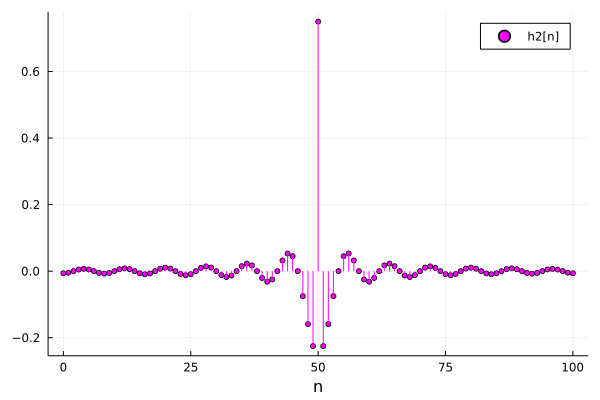

In [4]:
n2 = 0:N - 1
h2 = ((π-ωc)/π) * sinc.( ((π-ωc)/π) * (n2 .- L)) .* (-1).^(n2)
plot(n2, h2, line = :stem, marker = (:circle, 3), xlabel = "n", label = "h2[n]", color = :magenta)

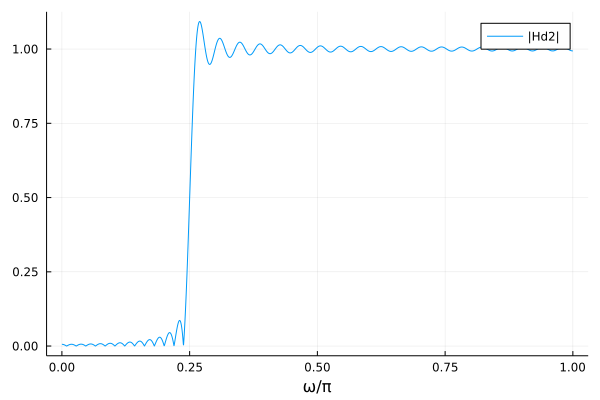

In [5]:
hdf2 = PolynomialRatio(h2, [1])
ω = range(0, π, length = 2500)
Hd2 = freqresp(hdf2, ω)
plot(ω / π, abs.(Hd2), label = "|Hd2|", xlabel = "ω/π")

$\textbf{2)}$ Para esse exercício foi implementada uma função que recebe um sinal de entrada e um filtro, e realiza a convolução entre os sinais

In [6]:
function filtro(h, x)
    y = zeros(length(x))
    N = length(h)
    k = length(x)
    for n in 1:k
        for i in 0:n-1
            y[n] = y[n] + h[i+1]*x[n-i]
        end
    end
    return y        
end
    

filtro (generic function with 1 method)

$\textbf{3)}$ Para testarmos os filtros projetados, criamos o sinal que representa uma soma de cossenos com frequências $\frac{\pi}{20} \ e \ \frac{\pi}{3}$

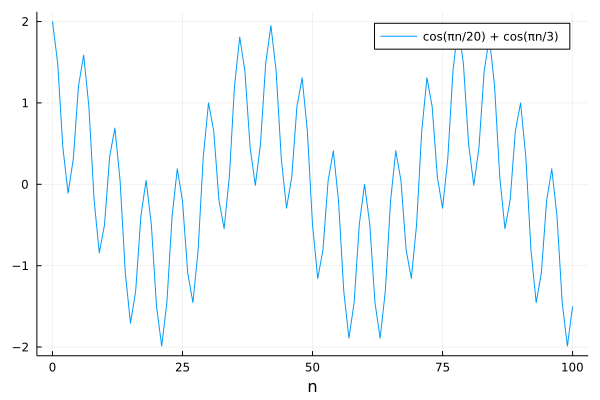

In [7]:
x1 = cos.(π*n/20)
x2 = cos.(π*n/3)
x = x1+x2

plot(n, x, label="cos(πn/20) + cos(πn/3)", xlabel="n")

Utilizando a função filt() da biblioteca do Julia e a função filtro() criada, podemos perceber que ambas funcionam da mesma forma e fornecem o mesmo sinal de saida

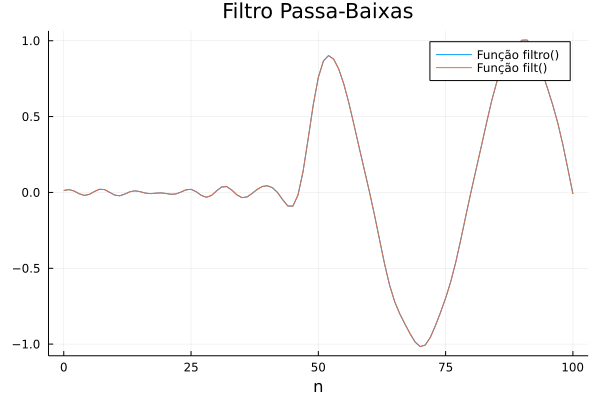

In [8]:
y11 = filtro(h, x);
y12 = filt(h, [1], x)

plot(n, y11, label="Função filtro()", xlabel="n", title="Filtro Passa-Baixas")
plot!(n, y12, label="Função filt()")

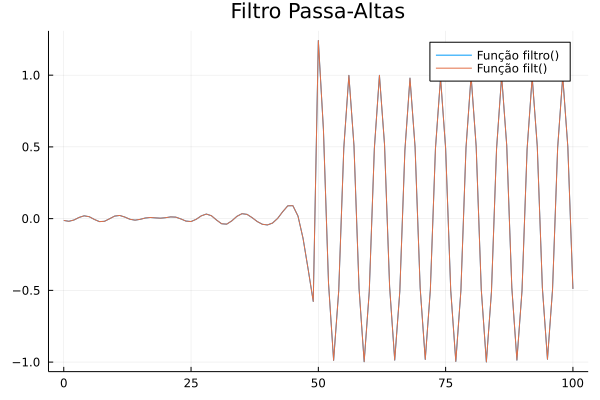

In [9]:
y21 = filtro(h2, x);
y22 = filt(h2, [1], x)

plot(n, y21, label="Função filtro()", title="Filtro Passa-Altas")
plot!(n, y22, label="Função filt()")

A resposta em frequência do filtro passa-baixas pode ser visto a seguir.

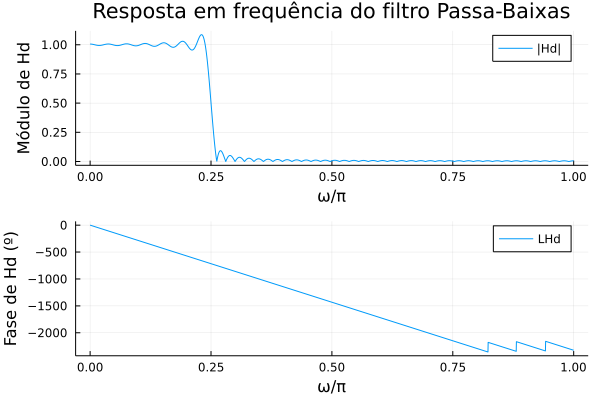

In [10]:
p1 = plot(ω / π, abs.(Hd), label = "|Hd|", xlabel = "ω/π", ylabel="Módulo de Hd", title="Resposta em frequência do filtro Passa-Baixas")
pHd = phaseresp(hdf, ω/π)
p2 = plot(ω / π, pHd*180/π, label = "LHd", xlabel = "ω/π", ylabel="Fase de Hd (º)")
plot(p1, p2, layout=(2,1))

É possível observar que o valor inicial da fase é 0º.

Já a resposta em frequência do filtro Passa-Altas, pode ser visto na imagem a seguir.

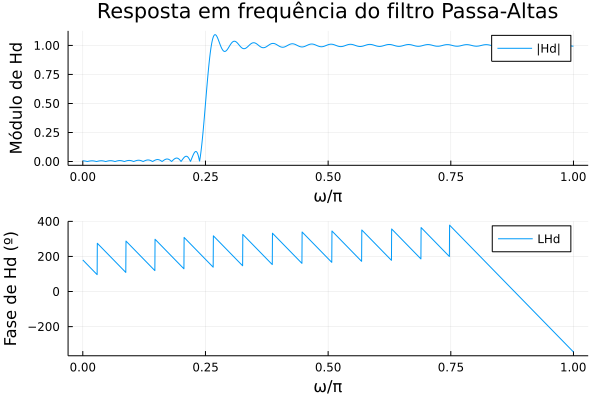

In [11]:
p1 = plot(ω / π, abs.(Hd2), label = "|Hd|", xlabel = "ω/π", ylabel="Módulo de Hd", title="Resposta em frequência do filtro Passa-Altas")
pHd2 = phaseresp(hdf2, ω/π)
p2 = plot(ω / π, pHd2*180/π, label = "LHd", xlabel = "ω/π", ylabel="Fase de Hd (º)")
plot(p1, p2, layout=(2,1))

Ao contrário do passa-baixas, a fase inicial é diferente de 0º, sendo igual a 180º, um valor que era previsto.

Agora, vamos comparar o sinal da entrada com o sinal filtrado

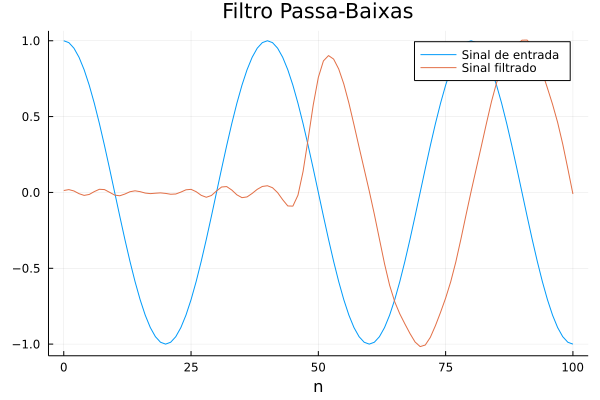

In [12]:
plot(n, x1, label="Sinal de entrada", xlabel="n", title="Filtro Passa-Baixas")
plot!(n, y11, label="Sinal filtrado")

Podemos observar que o sinal sofre uma defasagem no início fica atenuado e depois de um certo valor de n começa a ter uma amplitude próxima ao sinal da entrada.

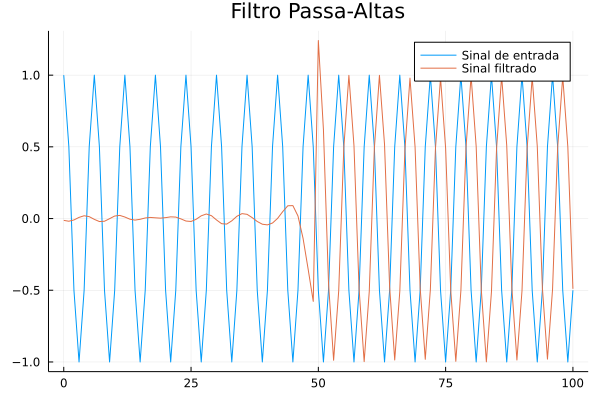

In [13]:
plot(n, x2, label="Sinal de entrada", title="Filtro Passa-Altas")
plot!(n, y21, label="Sinal filtrado")

Para o passa-altas, algo semelhante ocorre, no ínicio ele fica atenuado e depois de um valor de n o sinal tem uma amplitude próxima ao sinal da entrada, mas defasado

# Filtro Passa Baixas com Janela de Kaiser

Para projetar o filtro utilizando janelas de Kaiser, primeiramente é necessário identificar o valor mínimo de erro ou atenuação nas especificações. Com as especificações fornecidas no enunciado, vemos que o valor mínimo é de 0,001, referente a atenuação. 

In [14]:
ωp = π/20
ωr = π/3
ωc = (ωp + ωr)/2

A = -20*log10(0.001)
print(A)
β = 0.1102*(A-8.7)


60.0

5.65326

Como o valor do A deu 60, utilizamos a expressão mais adequada para o cálculo de $\beta$, esse caso (A>50), portanto, a equação utilizada foi: $\beta=0.1102\cdot(A-8.7)$.

Para calcular o número de coeficientes do filtro, foi utilizado a expressão: $N\approx\frac{A-8}{2,285\Delta{\omega}}+1$. Como o valor é aproximado, será utilizado a função ceil().

In [15]:
N = (A-8)/(2.285*(ωr-ωp))+1
N = Int64(ceil(N))
print(N)
M=N-1;
L=(N-1)/2;

27

Agora é possível obter o filtro passa-baixas

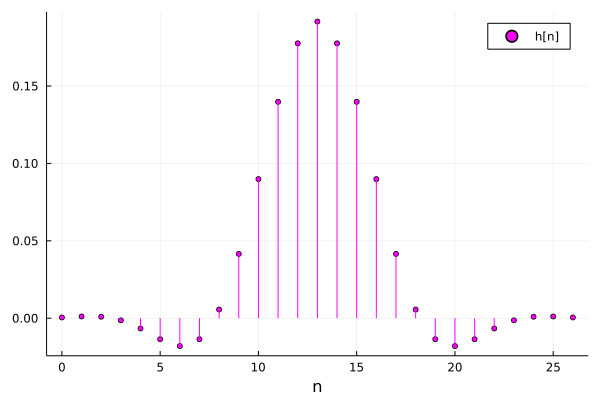

In [16]:
n=0:M
h=(ωc/π)*sinc.((ωc/π)*(n.-L)).*kaiser(N,β/π)

plot(n, h, line = :stem, marker = (:circle, 3), xlabel = "n", label = "h[n]", color = :magenta)

Para saber se o projeto está dentro dos requisitos, será necessário analisar a banda passante e a banda de rejeição, verificando se nenhum valor esteja inadequado

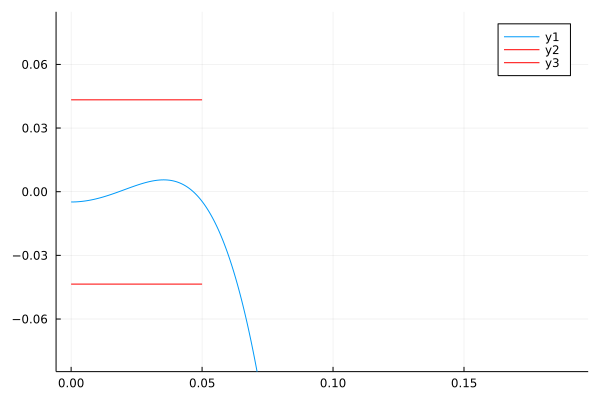

In [17]:
hf=PolynomialRatio(h,[1])
ω=range(0,π,length=5000)
H=freqz(hf,ω)
plot(ω/π,20*log10.(abs.(H)), xlim = [0 , ωc/π], ylim = [-0.08, 0.08])
plot!([0;ωp/π],20*log10.([0.995;0.995]),color="red")
plot!([0;ωp/π],20*log10.([1.005;1.005]),color="red")

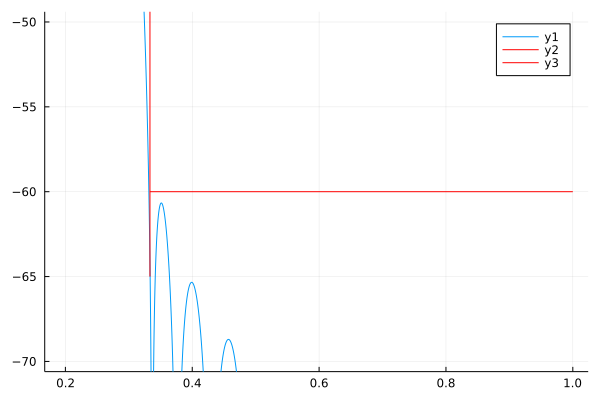

In [18]:
plot(ω/π,20*log10.(abs.(H)), xlim = [ωc/π,1], ylim = [-A-10,-A+10])
plot!([ωr;π]/π,20*log10.([0.001;0.001]),color="red")
plot!([ωr;ωr]/π,[-65;5],color="red")


Por fim, filtrando o sinal x, utilizado no item anterior, com esse novo filtro

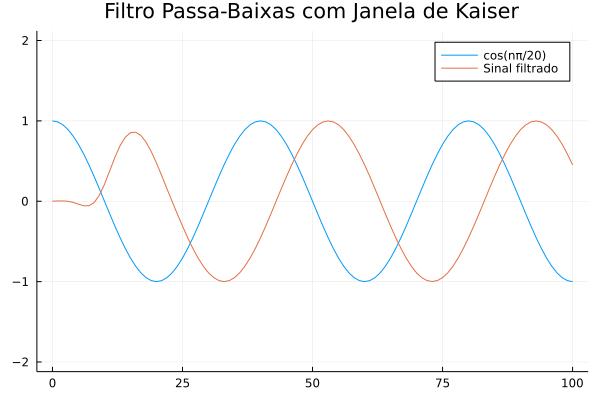

In [19]:
n1k = 0:100
y1k = filt(h, x)
plot(n1k,x1, label="cos(nπ/20)", ylim=[-2,2], title="Filtro Passa-Baixas com Janela de Kaiser")
plot!(n1k,y1k, label="Sinal filtrado")

# Filtro Passa altas com Janela de Kaiser

Para o projeto do passa-altas, foi utilizado o método de deslocar a resposta em frequência de $\pi$. Multiplicando a resposta ao impulso por $(-1)^n$

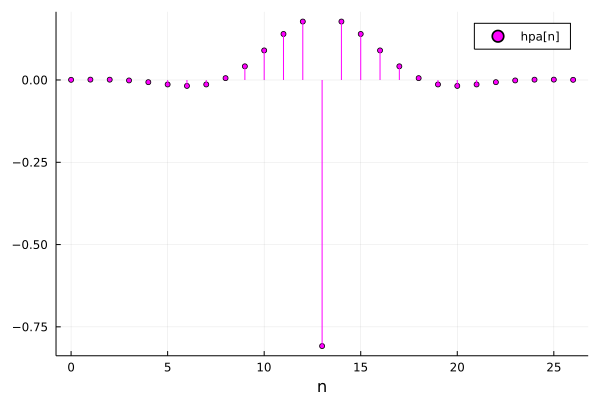

In [20]:
ωp_h = π - π/20
ωr_h = π - π/3
ωc_h = (ωp_h + ωr_h)/2

hpa=(ωc_h/π)*sinc.((ωc_h/π)*(n .- L)).*(-1).^(0:M).*kaiser(N,β/π)
hfpa=PolynomialRatio(hpa,[1])
plot(n, hpa, line = :stem, marker = (:circle, 3), xlabel = "n", label = "hpa[n]", color = :magenta)

Verificando os valores na banda passante e na banda de rejeição

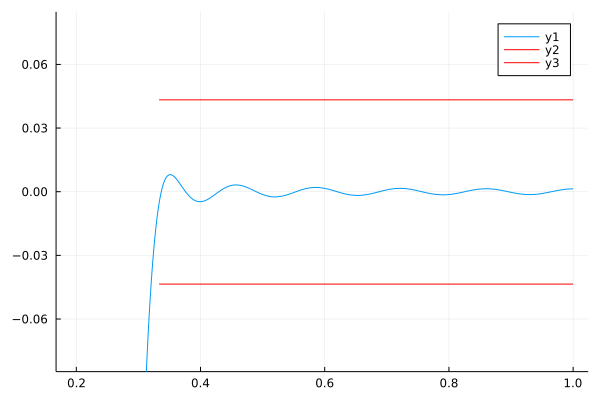

In [21]:
Hpa=freqz(hfpa,ω)
plot(ω/π,20*log10.(abs.(Hpa)), xlim = [ωc/π, 1], ylim = [-0.08, 0.08])
plot!([ωr/π;1],20*log10.([0.995;0.995]),color="red")
plot!([ωr/π;1],20*log10.([1.005;1.005]),color="red")

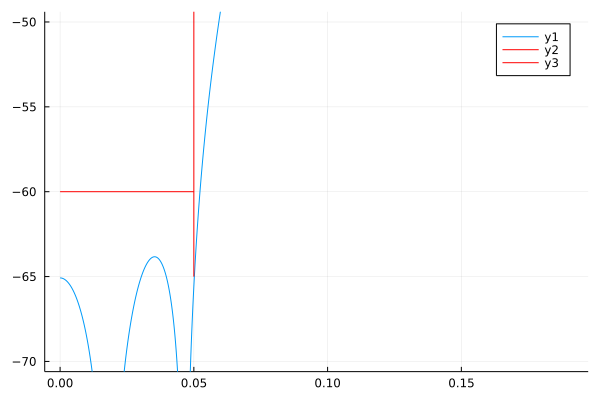

In [22]:
plot(ω/π,20*log10.(abs.(Hpa)), xlim = [0,ωc/π], ylim = [-A-10,-A+10])
plot!([0;ωp]/π,20*log10.([0.001;0.001]),color="red")
plot!([ωp;ωp]/π,[-65;5],color="red")

Filtrando o sinal, temos a seguinte saída

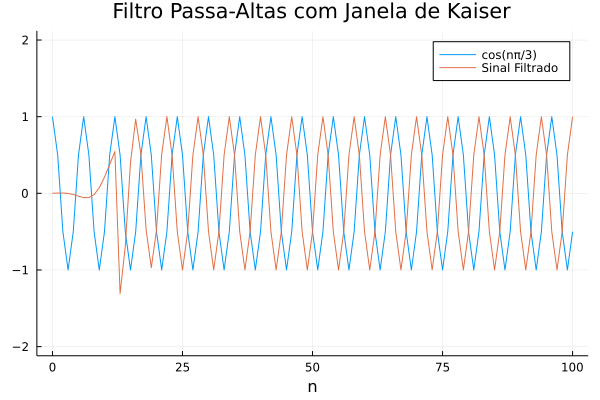

In [23]:
n2k = 0:100
y2k = filt(hpa,x)

plot(n2k,x2, label="cos(nπ/3)", ylim=[-2,2], xlabel="n", title="Filtro Passa-Altas com Janela de Kaiser")
plot!(n2k, y2k, label="Sinal Filtrado")


Como é possível verificar, depois de um certo n o valor em amplitude fica praticamente igual, tendo apenas a fase deslocada

# Filtro Passa-Baixas com método min-max

In [24]:
ωp = π/20
ωr = π/3
Δω = ωr - ωp
δp =  0.005
δr = 0.001

ωc = (ωp + ωr)/2;

A ordem do filtro pode ser estimada pela fórmula: $N \approx \frac{-10log(\delta_{p}\delta_{s})-13}{2.324\Delta \omega}$. Como o valor é aproximado, será utilizado a função ceil().

In [25]:
N = ceil(Int,(-10*log10(δp*δr)-13)/(2.324*Δω)) + 3

23

Para criar o filtro, será utilizado a função remez(). Nessa função, passamos o tamanho do filtro (N), além disso, definimos em relação a frequência qual delas desejamos que filtre.

In [26]:
hm = remez(N, [(0, ωp/2π) => (1,1), (ωr/2π, 0.5) => (0, δp/δr)])
M = N-1
L = M/2;

Plotando o filtro criado:

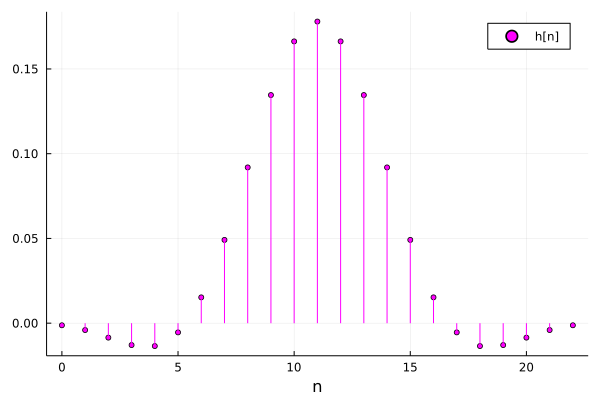

In [27]:
n = 0:M
plot(n, hm, line = :stem, marker = (:circle, 3), xlabel = "n", label = "h[n]", color = :magenta)


Verificando a banda passante e a banda de rejeição

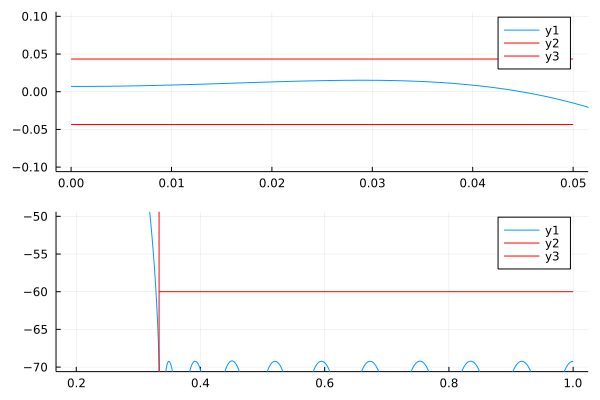

In [28]:
hf = PolynomialRatio(hm, [1])
H = freqz(hf, ω)
p1 = plot(ω/π, 20*log10.(abs.(H)), xlim = [0, 0.05], ylim = [-0.1, 0.1])
p1 = plot!([0;ωp/π], 20*log10.([1-δp;1-δp]),color = "red")
p1 = plot!([0;ωp/π], 20*log10.([1+δp;1+δp]), color = "red")

p2 = plot(ω/π, 20*log10.(abs.(H)),  xlim = [ωc/π,1], ylim = [-A-10,-A+10])
p2 = plot!([ωr;π]/π, 20*log10.([δr;δr]), color="red")
p2 = plot!([ωr;ωr]/π, [-A-15;5], color="red")

plot(p1,p2, layout=(2,1))

Filtrando o sinal e comparando com o cosseno de menor frequência

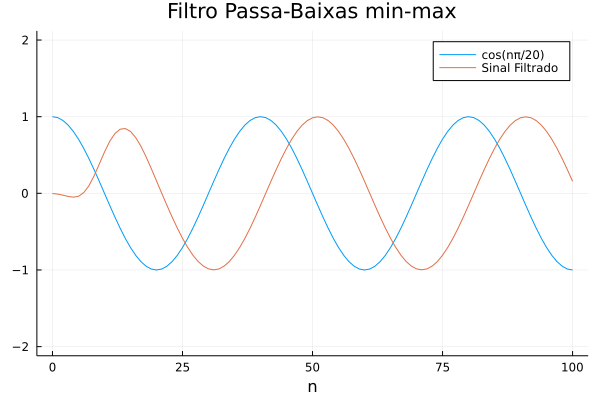

In [29]:
n1m = 0:100
y1m = filt(hm,x)

plot(n1m,x1, label="cos(nπ/20)",ylim=[-2,2], title="Filtro Passa-Baixas min-max")
plot!(n1m,y1m, label="Sinal Filtrado", xlabel="n")

Vemos que o filtro funcionou bem, tendo uma resposta parecida com o filtro usando Janelas de Kaiser

# Filtro Passa-Altas com método min-max

Por fim, usando o mesmo método anterior, mas agora como filtro Passa-Altas

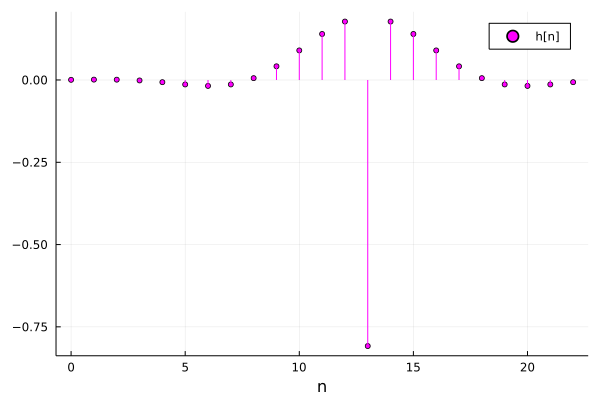

In [30]:
ωp_h = π/20
ωr_h = π/3
ωc_h = (ωp_h + ωr_h)/2

hmpa = remez(N, [(0, ωp/2π) => (0, δp/δr), (ωr/2π, 0.5) => (1,1)])

plot(n, hpa, line = :stem, marker = (:circle, 3), xlabel = "n", label = "h[n]", color = :magenta)

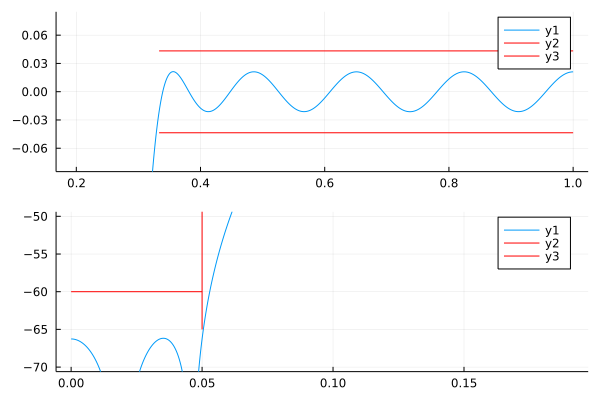

In [31]:
hf = PolynomialRatio(hmpa, [1])
H = freqz(hf, ω)
p1 = plot(ω/π, 20*log10.(abs.(H)),xlim = [ωc/π, 1], ylim = [-0.08, 0.08])
p1 = plot!([ωr/π;1], 20*log10.([1-δp;1-δp]),color = "red")
p1 = plot!([ωr/π;1], 20*log10.([1+δp;1+δp]), color = "red")

p2 = plot(ω/π, 20*log10.(abs.(H)), xlim = [0,ωc/π], ylim = [-A-10,-A+10])
p2 = plot!([0;ωp]/π, 20*log10.([δr;δr]), color="red")
p2 = plot!([ωp;ωp]/π, [-65;5], color="red")

plot(p1,p2, layout=(2,1))

Filtrando o sinal e comparando a saída com o cosseno de maior frequência

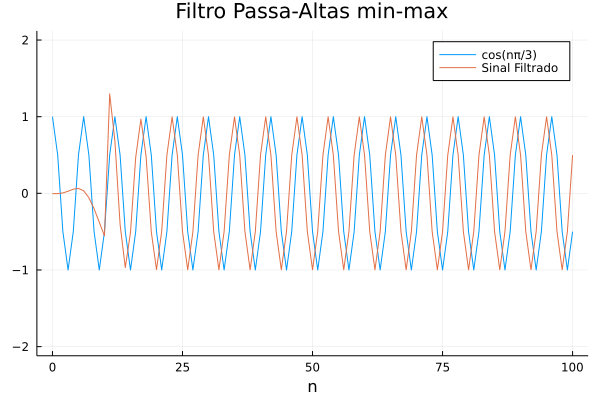

In [32]:
n2m = 0:100
y2m = filt(hmpa,x)

plot(n2m,x2, label="cos(nπ/3)",ylim=[-2,2], title="Filtro Passa-Altas min-max")
plot!(n2m,y2m, label="Sinal Filtrado", xlabel="n")